

**Presentación Final - Global Country Dataset 2023 (Kaggle)**






**IMPORTANTO LIBRERIAS Y LEYENDO LOS DATOS:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson


In [4]:
df=pd.read_csv("/content/datapop.csv")

**REVISANDO EL DATASET**

In [5]:
df.head()    # Explorando los primeros 10 registros del Dataset

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [6]:
df.columns     # Explorando cuantas columnas tiene el dataset y sus respectivos nombres

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
df.describe()     # Realizando análisis exploratorio de las variables numéricas en el Dataset

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [8]:
df.dtypes    # Revisando el tipo de datos qe posee el Dataset

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

Como se evidencia anteriormente, hay muchas variables que se encuentran en tipo object, ante lo cual deben realizarse las siguientes transformaciones a tipos **float64**:

**TRANSFORMANDO LOS DATOS PARA PERMITIR SU OPERABILIDAD**

In [9]:
df['GDP'] = df['GDP'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)
df['Population'] = df['Population'].str.replace(',', '').astype(float)
df['Tax revenue (%)'] = df['Tax revenue (%)'].str.replace('%', '').astype(float)
df['Forested Area (%)'] = pd.to_numeric(df['Forested Area (%)'].str.replace('%', ''), errors='coerce') / 100
df['Agricultural Land( %)'] = pd.to_numeric(df['Agricultural Land( %)'].str.replace('%', ''), errors='coerce') / 100
df['CPI Change (%)'] = pd.to_numeric(df['CPI Change (%)'].str.replace('%', ''), errors='coerce') / 100
df['Gross primary education enrollment (%)'] = pd.to_numeric(df['Gross primary education enrollment (%)'].str.replace('%', ''), errors='coerce') / 100
df['Gross tertiary education enrollment (%)'] = pd.to_numeric(df['Gross tertiary education enrollment (%)'].str.replace('%', ''), errors='coerce') / 100
df['Population: Labor force participation (%)'] = pd.to_numeric(df['Population: Labor force participation (%)'].str.replace('%', ''), errors='coerce') / 100

<ipython-input-9-fe564bdcee26>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GDP'] = df['GDP'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)


In [10]:
df['Urban_population'] = df['Urban_population'].str.replace(',','').astype(float)


In [11]:
df.describe()      # Revisando el nuevo conjunto de variables transformadas

,Agricultural Land( %),Birth Rate,Calling Code,CPI Change (%),Fertility Rate,Forested Area (%),GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Urban_population,Latitude,Longitude
count,188.000000,189.000000,194.000000,179.000000,188.000000,188.000000,1.930000e+02,188.000000,183.000000,189.000000,187.000000,181.000000,188.000000,1.940000e+02,176.000000,169.000000,1.900000e+02,194.000000,194.000000
mean,0.391176,20.214974,360.546392,0.067223,2.698138,0.320154,4.772959e+11,1.024702,0.379634,21.332804,72.279679,160.392265,1.839840,3.938116e+07,0.627381,16.573964,2.230454e+07,19.092351,20.232434
std,0.217831,9.945774,323.236419,0.244504,1.282267,0.237913,2.172173e+12,0.131516,0.292610,19.548058,7.483661,233.502024,1.684261,1.450924e+08,0.105029,6.961632,7.543050e+07,23.961779,66.716110
min,0.006000,5.900000,1.000000,-0.043000,0.980000,0.000000,4.727146e+07,0.234000,0.008000,1.400000,52.800000,2.000000,0.010000,8.360000e+02,0.380000,0.000000,5.464000e+03,-40.900557,-175.198242
25%,0.217000,11.300000,82.500000,0.010000,1.705000,0.110000,8.454620e+09,0.989500,0.121500,6.000000,67.000000,13.000000,0.332500,1.962678e+06,0.561500,11.700000,1.152961e+06,4.544175,-7.941496
50%,0.396000,17.950000,255.500000,0.023000,2.245000,0.320000,3.438723e+10,1.025500,0.312000,14.000000,73.200000,53.000000,1.460000,8.826588e+06,0.624500,16.300000,4.678104e+06,17.273849,20.972652
75%,0.553750,28.750000,506.750000,0.042500,3.597500,0.481750,2.340940e+11,1.080250,0.631500,32.700000,77.500000,186.000000,2.935000,2.858549e+07,0.695000,21.100000,1.490324e+07,40.124603,48.281523
max,0.826000,46.080000,1876.000000,2.549000,6.910000,0.983000,2.142770e+13,1.425000,1.366000,84.500000,85.400000,1150.000000,8.420000,1.397715e+09,0.868000,37.200000,8.429340e+08,64.963051,178.065032


**CREANDO Y GENERANDO EL ANALISIS DE LAS FUNCIONES OBJETIVO DEL DATASET:**

**PRIMER ANALISIS:** Tasa de mortalidad infantil

In [12]:
df['Infant Mortality Rate'] = (df['Infant mortality'] / 1000) * 100             # Funcion creada para analizar la tasa de mortalidad infantil por cada mil habitantes

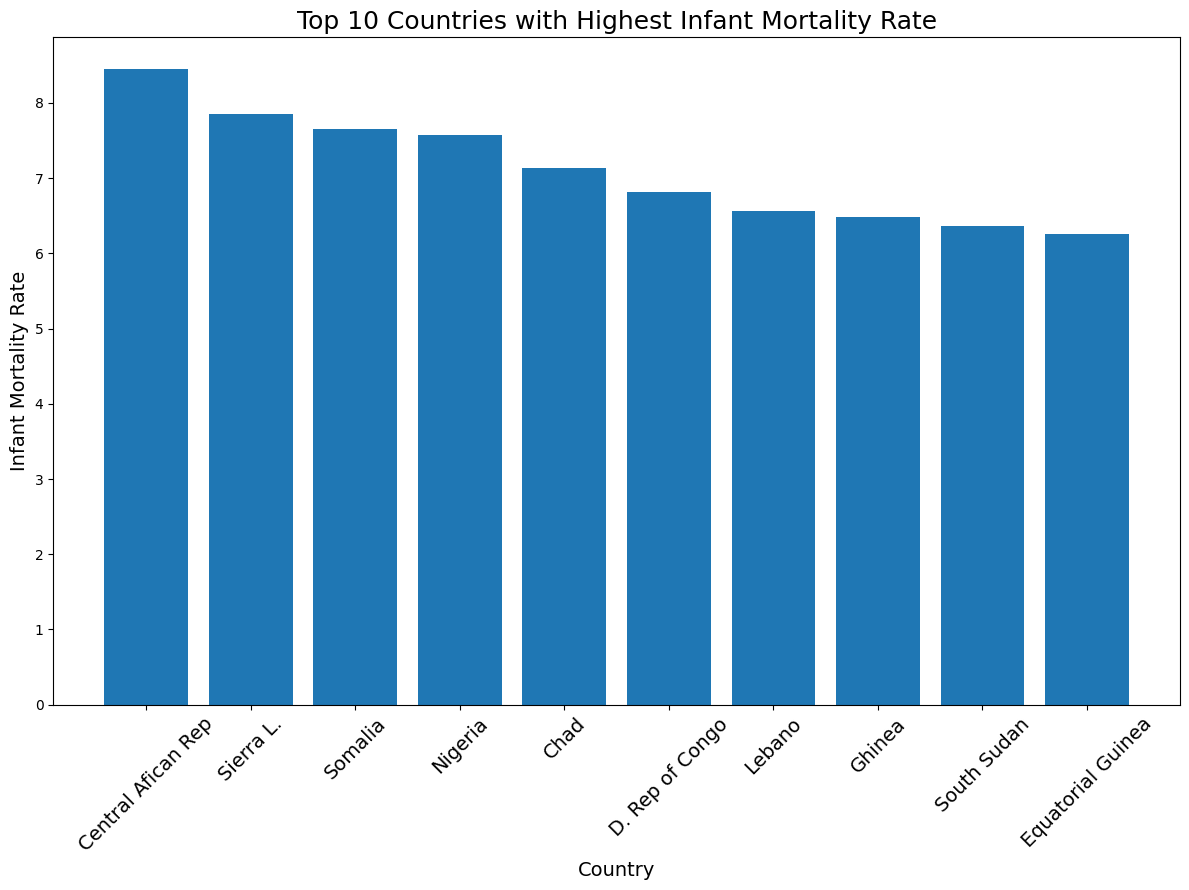

In [13]:
# Ordenar el DataFrame por la columna 'Infant Mortality Rate' en orden descendente y seleccionar el top 10
top_10_mortality = df.sort_values(by='Infant Mortality Rate', ascending=False).head(10)

# Graficar el top 10 de países con mayor tasa de mortalidad infantil
countries = ['Central Afican Rep', 'Sierra L.', 'Somalia',
             'Nigeria', 'Chad', 'D. Rep of Congo', 'Lebano',
             'Ghinea', 'South Sudan', 'Equatorial Guinea']

plt.figure(figsize=(12, 9))
plt.bar(countries, top_10_mortality['Infant Mortality Rate'])  # Hacer el gráfico de barras
plt.title('Top 10 Countries with Highest Infant Mortality Rate', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Infant Mortality Rate', fontsize=14)
plt.xticks(rotation=45, fontsize=14)  # Rotar etiquetas del eje X para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

**SEGUNDO ANALISIS**: Tasa de Población Urbana

In [14]:
df['Urban Population Rate'] = df['Urban_population'] / df['Population']  #  Relacion entre el número de poblacion urbana con respecto al número de población total de un país.

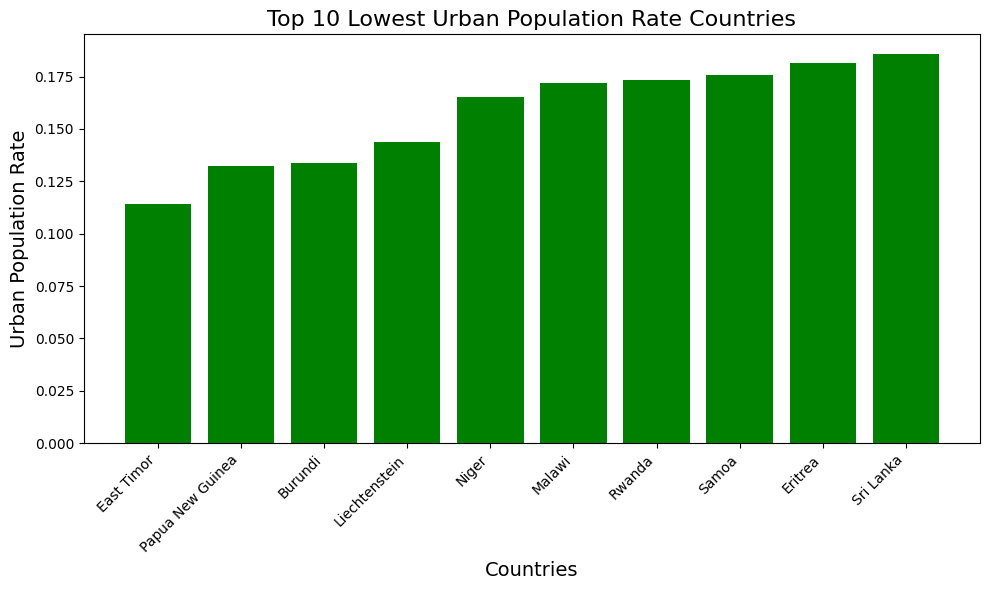

In [15]:
df_lowest_urban = df.sort_values(by='Urban Population Rate').head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
plt.bar(df_lowest_urban['Country'], df_lowest_urban['Urban Population Rate'], color='green')
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Urban Population Rate',fontsize=14)
plt.title('Top 10 Lowest Urban Population Rate Countries',fontsize=16)
plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas del eje x para una mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado
plt.show()

**TERCER ANALISIS:** Promedio de mortalidad materna con relación al número de médicos por cada mil habitantes

In [16]:
#Se crean los rangos de médicos por cada mil, y las etiquetas respectivas
bins = [0.00, 2.00, 4.00, 6.00, 8.00, 10.00]
labels = ['0.00 - 2.00', '2.01 - 4.00', '4.01 - 6.00', '6.01 - 8.00', '8.01 - 10.00']

#Se añade la nueva columna ('Phys. per thous. Range') a la base trabajada
df['Phys. per thous. Range'] = pd.cut(df['Physicians per thousand'], bins=bins, labels=labels, right=True)

# Se saca un promedio de la tasa de mortalidad materna por cada rango de médicos por cada mil
datos_agrupados = df.pivot_table(index='Phys. per thous. Range', values='Maternal mortality ratio', aggfunc='sum')
datos_agrupados

,Maternal mortality ratio
Phys. per thous. Range,
0.00 - 2.00,26469.0
2.01 - 4.00,1100.0
4.01 - 6.00,243.0
6.01 - 8.00,33.0
8.01 - 10.00,36.0


**CUARTO ANALISIS:** Analisis geoespacial del numero de habitantes por cada pais (population):

In [17]:
#Se crean los rangos de población, y las etiquetas respectivas
bins = [1.00, 5000000.00, 10000000.00, 50000000.00, 100000000.00, 500000000.00, 5000000000.00]
labels = ['1 unity - 5 millions', '5 millions and one - ten millions', 'ten millions and one - 50 millions', '50 millions and one - 100 millions', '100 million and one - 500 millions', 'more tan 500 millions']

#Se añade la nueva columna ('Population Range') a la base trabajada
df['Population Range'] = pd.cut(df['Population'], bins=bins, labels=labels, right=True)
df


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude,Infant Mortality Rate,Urban Population Rate,Phys. per thous. Range,Population Range
0,Afghanistan,60,AF,0.581,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,9.3,71.40%,11.12%,9797273.0,33.939110,67.709953,4.79,0.257540,0.00 - 2.00,ten millions and one - 50 millions
1,Albania,105,AL,0.431,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,18.6,36.60%,12.33%,1747593.0,41.153332,20.168331,0.78,0.612290,0.00 - 2.00,1 unity - 5 millions
2,Algeria,18,DZ,0.174,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,37.2,66.10%,11.70%,31510100.0,28.033886,1.659626,2.01,0.731890,0.00 - 2.00,ten millions and one - 50 millions
3,Andorra,164,AD,0.400,468,NaN,7.20,376.0,Andorra la Vella,469,...,NaN,NaN,NaN,67873.0,42.506285,1.521801,0.27,0.879845,2.01 - 4.00,1 unity - 5 millions
4,Angola,26,AO,0.475,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,9.2,49.10%,6.89%,21061025.0,-11.202692,17.873887,5.16,0.661770,0.00 - 2.00,ten millions and one - 50 millions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,0.245,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,NaN,73.30%,8.80%,25162368.0,6.423750,-66.589730,2.14,0.882400,0.00 - 2.00,ten millions and one - 50 millions
191,Vietnam,314,VN,0.393,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,19.1,37.60%,2.01%,35332140.0,14.058324,108.277199,1.65,0.366280,0.00 - 2.00,50 millions and one - 100 millions
192,Yemen,56,YE,0.446,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,NaN,26.60%,12.91%,10869523.0,15.552727,48.516388,4.29,0.372730,0.00 - 2.00,ten millions and one - 50 millions
193,Zambia,25,ZM,0.321,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,16.2,15.60%,11.43%,7871713.0,-13.133897,27.849332,4.04,0.440720,0.00 - 2.00,ten millions and one - 50 millions


In [18]:
import plotly.express as px
import pandas as pd

# Import data from GitHub
#data = pd.read_csv('/content/datapop.csv')

# Create geospatial choropleth map
df_sorted2 = df.sort_values(by='Population Range', ascending=True)
fig = px.choropleth(df_sorted2, locations='Country', color='Population Range', hover_name='Population',
                    locationmode='country names', projection='natural earth',
                    title='Countries per Population Range')
fig.show()

**QUINTO ANALISIS:** Analisis geoespacial del porcentaje de tierra usada para la agricultura por cada pais (population):

In [ ]:
#Se crean los rangos de tierra, y las etiquetas respectivas
bins = [0, 20, 40, 60, 80, 100]
labels = ['0% - 20%', '20.01% - 40%', '40.01% - 60%', '60.01% - 80%', '80.01% - 100%']

#Se añade la nueva columna ('Agricultural Land( %) Range') a la base trabajada
df['Agricultural Land Range'] = pd.cut(df['Agricultural Land( %)'], bins=bins, labels=labels, right=True)
df

In [31]:
import plotly.express as px
import pandas as pd

# Create geospatial choropleth map
df_sorted = df.sort_values(by='Agricultural Land Range', ascending=True)

fig = px.choropleth(df_sorted, locations='Country', color='Agricultural Land( %)', hover_name='Agricultural Land Range',
                    locationmode='country names', projection='natural earth',
                    title='Countries per Agricultural Land Range')
fig.show()

**OBSERVACION FINAL:**

El presente archivo fue desarrollado para la obtención y análisis de los datos que posteriormente serian desglozados en forma de presentación final para la asignatura; el análisis a profundidad de los mismos, el desarrollo de la presentacion, objetivos iniciales y finales, alcance y pertinencia de los datos para el desarrollo del modelo planteado, se encuentran incluidos en el archivo.PPTX Adjunto a correo electrónico y/o repositorio de Github Correspondientes.